In [ ]:
!pip install keras
!pip install tensorflow
!pip install pandas
!pip install matplotlib seaborn

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, LSTM
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [73]:
df = pd.read_csv("./CSV_Files/resampled_glucose_data.csv")
# Drop all the columns which have unnamed in them
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.head()

,Glucose_time,reading
0,2023-03-05 00:05:00,115.0
1,2023-03-05 00:10:00,115.0
2,2023-03-05 00:15:00,114.0
3,2023-03-05 00:20:00,116.0
4,2023-03-05 00:25:00,116.5


In [74]:
# Set the Glucose_time to datetime format and set it as the index
df['Glucose_time'] = pd.to_datetime(df['Glucose_time'])
df.set_index('Glucose_time', inplace=True)
df.head()

,reading
Glucose_time,
2023-03-05 00:05:00,115.0
2023-03-05 00:10:00,115.0
2023-03-05 00:15:00,114.0
2023-03-05 00:20:00,116.0
2023-03-05 00:25:00,116.5


In [75]:
checked_df = df.copy()

In [76]:
scaler = MinMaxScaler(feature_range=(0, 1))
df['reading'] = scaler.fit_transform(df[['reading']])
df.head()

,reading
Glucose_time,
2023-03-05 00:05:00,0.840909
2023-03-05 00:10:00,0.840909
2023-03-05 00:15:00,0.818182
2023-03-05 00:20:00,0.863636
2023-03-05 00:25:00,0.875000


In [77]:
df.shape

(287, 1)

In [78]:
def prepare_data(time_series_data, n_features):
    X, y = [], []
    for i in range(len(time_series_data)):
        end_ix = i + n_features
        if end_ix > len(time_series_data)-1:
            break
        seq_x, seq_y = time_series_data[i:end_ix], time_series_data[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [79]:
n_features_lst = [2, 4, 5, 6, 8, 10]
patience_lst = [5, 10, 15, 20]

In [80]:
time_series_data = df['reading'].values

In [81]:
best_parameter = {}
best_rmse = float('inf')
best_predictions = None
best_model = None

In [82]:
for n in n_features_lst:
    for pat in patience_lst:
        X, y = prepare_data(time_series_data, n)
        X = X.reshape((X.shape[0], X.shape[1], 1))

        train_size = 240
        val_size = 24

        X_train, y_train = X[:train_size], y[:train_size]
        X_val, y_val = X[train_size:train_size+val_size], y[train_size:train_size+val_size]
        X_test, y_test = X[train_size+val_size:], y[train_size+val_size:]

        
        # Building the LSTM Model
        model = Sequential()
        model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n, 1)))
        model.add(LSTM(50, activation='relu'))
        model.add(Dense(1))
        model.compile(optimizer='adam', loss='mse')

        # Early stopping
        early_stopping = EarlyStopping(monitor='val_loss', patience=pat, verbose=1)

        # Fitting the model
        model.fit(X_train, y_train, epochs = 300, validation_data=(X_val, y_val), callbacks=[early_stopping], verbose=0)

        # Choosing the best model based on the validation loss
        predictions = model.predict(X_val)
        rmse = np.sqrt(mean_squared_error(y_val, predictions))
        if rmse < best_rmse:
            best_rmse = rmse
            best_parameter['n_features'] = n
            best_parameter['patience'] = pat
            best_predictions = predictions
            best_model = model

print("*" * 50)
print("Best Parameters: ", best_parameter)
print("Best RMSE: ", best_rmse)
print("Prediction :- ", best_predictions)

c:\Users\BMVSI-138\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 25: early stopping
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 955ms/step


c:\Users\BMVSI-138\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 32: early stopping
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


c:\Users\BMVSI-138\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 170: early stopping
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


c:\Users\BMVSI-138\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 57: early stopping
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


c:\Users\BMVSI-138\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 16: early stopping
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


c:\Users\BMVSI-138\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 23: early stopping
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


c:\Users\BMVSI-138\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 25: early stopping
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


c:\Users\BMVSI-138\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


c:\Users\BMVSI-138\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 16: early stopping
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


c:\Users\BMVSI-138\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 19: early stopping
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


c:\Users\BMVSI-138\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 25: early stopping
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


c:\Users\BMVSI-138\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 29: early stopping
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


c:\Users\BMVSI-138\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 10: early stopping
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


c:\Users\BMVSI-138\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 19: early stopping
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


c:\Users\BMVSI-138\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 22: early stopping
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


c:\Users\BMVSI-138\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 52: early stopping
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


c:\Users\BMVSI-138\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 13: early stopping
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


c:\Users\BMVSI-138\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 16: early stopping
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


c:\Users\BMVSI-138\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 21: early stopping
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


c:\Users\BMVSI-138\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 25: early stopping
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


c:\Users\BMVSI-138\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 12: early stopping
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


c:\Users\BMVSI-138\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 16: early stopping
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


c:\Users\BMVSI-138\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 21: early stopping
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 602ms/step


c:\Users\BMVSI-138\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 29: early stopping
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
**************************************************
Best Parameters:  {'n_features': 2, 'patience': 15}
Best RMSE:  0.04097690496221036
Prediction :-  [[0.345416  ]
 [0.34466258]
 [0.33380234]
 [0.33691314]
 [0.3649072 ]
 [0.38733324]
 [0.38106096]
 [0.41012087]
 [0.43327206]
 [0.39681515]
 [0.38898957]
 [0.3777744 ]
 [0.46918926]
 [0.46528322]
 [0.4772248 ]
 [0.5363768 ]
 [0.4795125 ]
 [0.44801638]
 [0.41716167]
 [0.36730653]
 [0.52596337]
 [0.63904244]
 [0.63888156]
 [0.6442889 ]]


In [83]:
validation_predictions_in_original_scale = scaler.inverse_transform(best_predictions)
xlst = validation_predictions_in_original_scale.flatten()
xlst

array([ 93.1983  ,  93.16515 ,  92.68731 ,  92.82417 ,  94.055916,
        95.042656,  94.766685,  96.04532 ,  97.06397 ,  95.45986 ,
        95.11555 ,  94.62208 ,  98.644325,  98.47246 ,  98.997894,
       101.60057 ,  99.09855 ,  97.71272 ,  96.35512 ,  94.16148 ,
       101.14239 , 106.11787 , 106.110794, 106.34872 ], dtype=float32)

In [84]:
def get_previous_3_values_mean(df, index):
    # Get the previous 3 values of the index
    previous_3_values = df.iloc[index-3:index]

    # Inverse transform the values
    previous_3_values = scaler.inverse_transform(previous_3_values)

    # Take the mean of the previous 3 values
    return np.mean(previous_3_values)

mean_240 = get_previous_3_values_mean(df, 240)
mean_240

95.66666666666667

In [85]:
# Actual values of the validation set
actual_values = df['reading'].values[train_size:train_size+val_size]
actual_values = actual_values.reshape(-1, 1)
actual_values_in_original_scale = scaler.inverse_transform(actual_values)
actual_values_in_original_scale.flatten()

array([ 96.        ,  94.        ,  93.5       ,  93.        ,
        93.        ,  94.        ,  95.        ,  95.        ,
        96.        ,  97.        ,  96.        ,  95.5       ,
        95.        ,  98.        ,  98.5       ,  99.        ,
       101.        ,  99.66666667,  98.33333333,  97.        ,
        95.        , 100.        , 105.        , 106.        ])

In [86]:
# Now I want it to be printed in the form of a dataframe with the predicted values with a shift of 1 and the actual values

final = pd.DataFrame()
# Append the time of time series from values 240 to 264
final['time'] = df.index[train_size:train_size+val_size]

# To get the mean of 240 pass the value of 240 in the get_previous_3_values_mean function
mean_240 = get_previous_3_values_mean(df, 240)

# Remove the last value of the predicted values and store it in a variable
last_value = validation_predictions_in_original_scale[-1]
validation_predictions_in_original_scale = validation_predictions_in_original_scale[:-1]

# Append the precited values with a shift of 1 and the predicted value at 240 being the mean of actual values at 237, 238 and 239. Append the mean first and then the predicted values
final['Shifted_prediction'] = [mean_240] + validation_predictions_in_original_scale.flatten().tolist()
final['unshifted_prediction'] = xlst.flatten().tolist()

# Append the actual values
final['actual'] = actual_values_in_original_scale.flatten()

In [87]:
final

,time,Shifted_prediction,unshifted_prediction,actual
0,2023-03-05 20:05:00,95.666667,93.198303,96.000000
1,2023-03-05 20:10:00,93.198303,93.165154,94.000000
2,2023-03-05 20:15:00,93.165154,92.687309,93.500000
3,2023-03-05 20:20:00,92.687309,92.824173,93.000000
4,2023-03-05 20:25:00,92.824173,94.055916,93.000000
5,2023-03-05 20:30:00,94.055916,95.042656,94.000000
6,2023-03-05 20:35:00,95.042656,94.766685,95.000000
7,2023-03-05 20:40:00,94.766685,96.045319,95.000000
8,2023-03-05 20:45:00,96.045319,97.063972,96.000000
9,2023-03-05 20:50:00,97.063972,95.459862,97.000000


In [88]:
# Now we train the model again using the best parameters but now we will train it on the entire dataset and exclude the test data from the dataset

X, y = prepare_data(time_series_data, best_parameter['n_features'])
X = X.reshape((X.shape[0], X.shape[1], 1))

# Splitting the data into train, validation and test sets
# Train data should be of 264 values of the data set and not 240
# Validation data is remaining 24 values of the data set

train_size = 264

X_train, y_train = X[:train_size], y[:train_size]

# Building the LSTM Model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(best_parameter['n_features'], 1)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Fitting the model
model.fit(X_train, y_train, epochs = 300, verbose=0)

# Now we will predict the test data
predictions = model.predict(X[train_size:])
rmse = np.sqrt(mean_squared_error(y[train_size:], predictions))

c:\Users\BMVSI-138\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


In [89]:
# Now converting the predictions to the original scale
predictions_in_original_scale = scaler.inverse_transform(predictions)
plst = predictions_in_original_scale.flatten()
plst

array([107.01616 ,  99.1131  , 100.39814 ,  99.391495,  98.398605,
       100.19362 ,  99.80129 , 101.21674 , 100.10227 ,  99.59859 ,
       104.06789 ,  98.51876 ,  94.26603 ,  89.45571 ,  91.292816,
       100.14491 , 100.5874  , 101.21674 , 103.68684 , 104.34146 ,
       100.87141 ], dtype=float32)

In [90]:
len(predictions_in_original_scale)

21

In [91]:
len(X)

285

In [92]:
best_parameter

{'n_features': 2, 'patience': 15}

In [93]:
# Getting the actual values of the test data
actual_values = df['reading'].values[train_size+best_parameter['n_features']:]
actual_values = actual_values.reshape(-1, 1)
actual_values_in_original_scale = scaler.inverse_transform(actual_values)
actual_values_in_original_scale.flatten()

array([102. , 101. , 100. ,  99. , 100. , 100. , 101. , 100.5, 100. ,
       103. , 100. ,  96. ,  91. ,  91. ,  98. , 100. , 101. , 103. ,
       104. , 102. , 107. ])

In [94]:
predictions_in_original_scale = predictions_in_original_scale.flatten()

# We remove the last value of the predicted values and store it in a variable
last_value = predictions_in_original_scale[-1]
predictions_final = predictions_in_original_scale[:-1]

# Now we add the mean of the last 3 values of the training data as the first value of the predictions_final and then append the predictions_final to the predictions_final
mean_264 = get_previous_3_values_mean(df, 264)
predictions_final = [mean_264] + predictions_final.tolist()

# Now we will create a dataframe with the time series and the actual values and the predicted values
final_test = pd.DataFrame()
final_test['time'] = df.index[train_size+best_parameter['n_features']:]
final_test["unshifted_predcition"] = plst
final_test['predicted'] = predictions_final
final_test['actual'] = actual_values_in_original_scale.flatten()

final_test


,time,unshifted_predcition,predicted,actual
0,2023-03-05 22:15:00,107.016159,103.666667,102.0
1,2023-03-05 22:20:00,99.113098,107.016159,101.0
2,2023-03-05 22:25:00,100.398140,99.113098,100.0
3,2023-03-05 22:30:00,99.391495,100.398140,99.0
4,2023-03-05 22:35:00,98.398605,99.391495,100.0
5,2023-03-05 22:40:00,100.193619,98.398605,100.0
6,2023-03-05 22:45:00,99.801292,100.193619,101.0
7,2023-03-05 22:50:00,101.216743,99.801292,100.5
8,2023-03-05 22:55:00,100.102272,101.216743,100.0
9,2023-03-05 23:00:00,99.598587,100.102272,103.0


In [95]:
# Now we will again train the data on entire dataset using the best parameters and then predict the future 10 values

X, y = prepare_data(time_series_data, best_parameter['n_features'])
X = X.reshape((X.shape[0], X.shape[1], 1))

# Building the LSTM Model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(best_parameter['n_features'], 1)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Fitting the model
model.fit(X, y, epochs = 300, verbose=0)

# Now we will predict the future 10 values
future_predictions = []
last_values = X[-1]
for i in range(10):
    future_predictions.append(model.predict(last_values.reshape(1, best_parameter['n_features'], 1))[0][0])
    last_values = np.append(last_values[1:], future_predictions[-1])

c:\Users\BMVSI-138\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 600ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


In [96]:
future_predictions = np.array(future_predictions)
future_predictions = future_predictions.reshape(-1, 1)
future_predictions_in_original_scale = scaler.inverse_transform(future_predictions)

In [97]:
future_predictions_in_original_scale.flatten()

array([101.688286, 102.273735, 103.32647 , 104.57723 , 105.75444 ,
       106.78516 , 107.68057 , 108.46519 , 109.16128 , 109.78664 ],
      dtype=float32)

In [98]:
# I have a data frame called checked df which has the reading as a column and reading_time as the index
# Now in this dataframe add 10 columns with their time and readings as predicted by the model

# Get the last time of the checked_df
last_time = checked_df.index[-1]

# Get the time of the future predictions
future_time = pd.date_range(start=last_time, periods=10, freq='5min')[0:]

# Create a dataframe with the future time and the future predictions
future_df = pd.DataFrame()
future_df['time'] = future_time

future_df['reading'] = future_predictions_in_original_scale.flatten()

In [99]:
future_df

,time,reading
0,2023-03-05 23:55:00,101.688286
1,2023-03-06 00:00:00,102.273735
2,2023-03-06 00:05:00,103.326469
3,2023-03-06 00:10:00,104.577232
4,2023-03-06 00:15:00,105.754440
5,2023-03-06 00:20:00,106.785156
6,2023-03-06 00:25:00,107.680573
7,2023-03-06 00:30:00,108.465187
8,2023-03-06 00:35:00,109.161278
9,2023-03-06 00:40:00,109.786636


In [105]:
# Rename the columns of future df to match the checked df
future_df.rename(columns={'time': 'reading_time', 'reading': 'reading'}, inplace=True)
future_df.head()

,reading_time,reading
0,2023-03-05 23:55:00,101.688286
1,2023-03-06 00:00:00,102.273735
2,2023-03-06 00:05:00,103.326469
3,2023-03-06 00:10:00,104.577232
4,2023-03-06 00:15:00,105.754440


In [106]:
future_df.set_index('reading_time', inplace=True)

In [103]:
checked_df.head()

,reading
Glucose_time,
2023-03-05 00:05:00,115.0
2023-03-05 00:10:00,115.0
2023-03-05 00:15:00,114.0
2023-03-05 00:20:00,116.0
2023-03-05 00:25:00,116.5


In [108]:
final_df = pd.concat([checked_df, future_df], ignore_index=False)

In [110]:
final_df.tail(20)

,reading
2023-03-05 23:10:00,96.000000
2023-03-05 23:15:00,91.000000
2023-03-05 23:20:00,91.000000
2023-03-05 23:25:00,98.000000
2023-03-05 23:30:00,100.000000
2023-03-05 23:35:00,101.000000
2023-03-05 23:40:00,103.000000
2023-03-05 23:45:00,104.000000
2023-03-05 23:50:00,102.000000
2023-03-05 23:55:00,107.000000


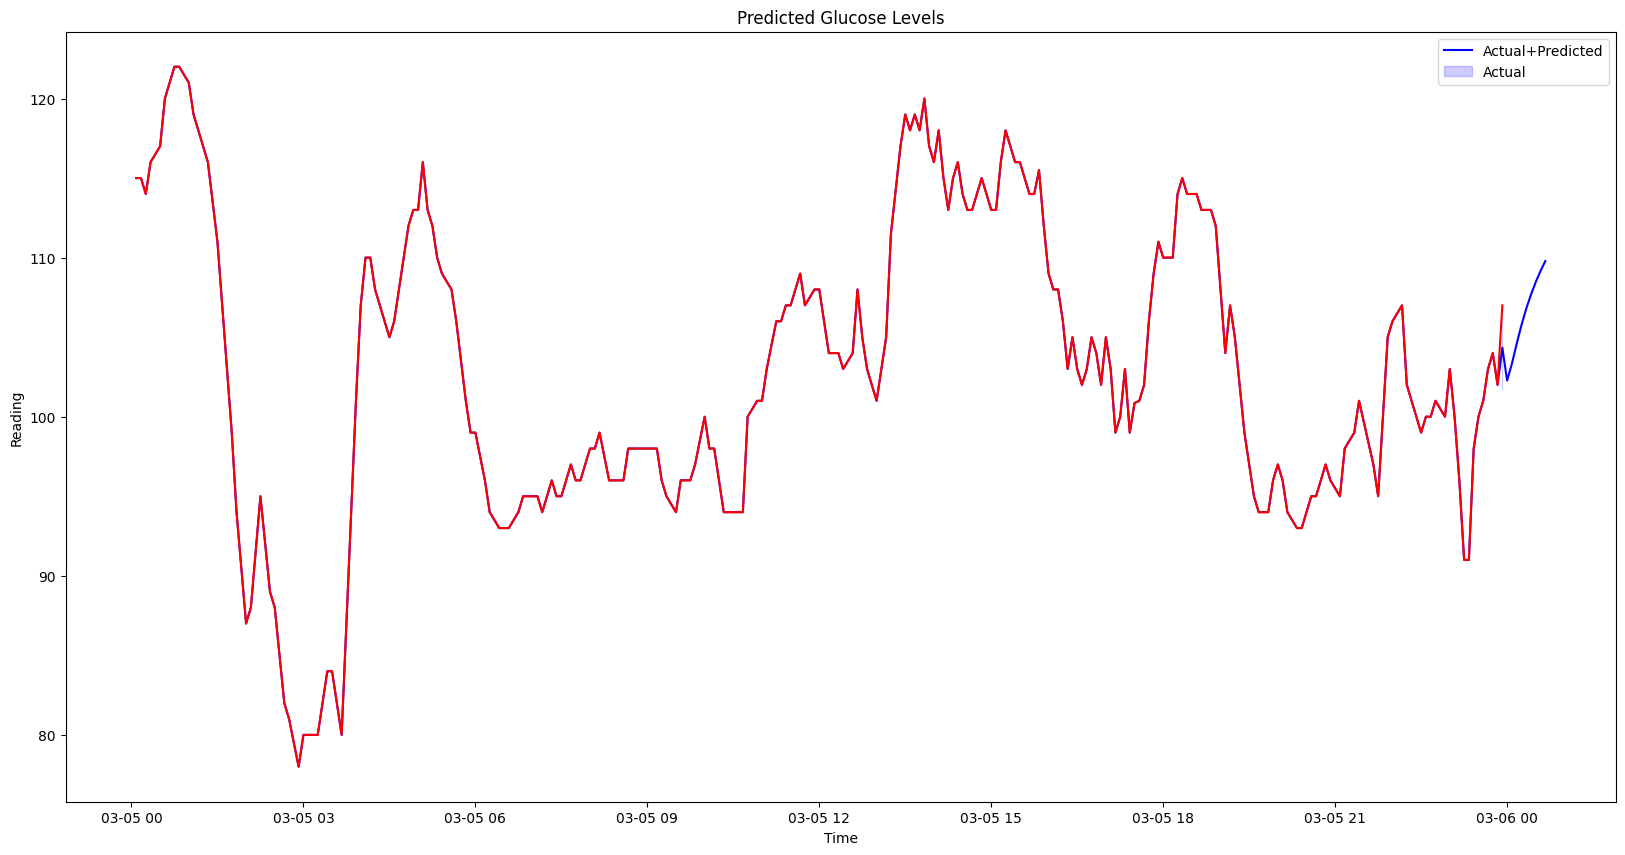

In [111]:
# Now we plot the graph of the final_df along with the checked df.

plt.figure(figsize=(20, 10))
sns.lineplot(data=final_df, x=final_df.index, y='reading', color='blue')
sns.lineplot(data=checked_df, x=checked_df.index, y='reading', color='red')

plt.xlabel('Time')
plt.ylabel('Reading')
plt.title('Predicted Glucose Levels')

plt.legend(['Actual+Predicted', 'Actual'])
plt.show()

In [ ]:
n_features = 10

X, y = prepare_data(time_series_data, n_features)

In [ ]:
X = X.reshape((X.shape[0], X.shape[1], 1))

In [ ]:
split = int(0.8 * len(X))
X_train, X_val = X[:split], X[split:]
y_train, y_val = y[:split], y[split:]

In [ ]:
# Building the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_features, 1)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

early_stop = EarlyStopping(monitor='val_loss', patience=17)

history = model.fit(X_train, y_train, epochs=500, verbose=1, validation_data = (X_val, y_val) ,callbacks=[early_stop])

c:\Users\BMVSI-138\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 14s 322ms/step - loss: 0.3545 - val_loss: 0.1484
Epoch 2/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.2260 - val_loss: 0.0567
Epoch 3/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0982 - val_loss: 0.0153
Epoch 4/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0322 - val_loss: 0.0257
Epoch 5/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0301 - val_loss: 0.0090
Epoch 6/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0244 - val_loss: 0.0091
Epoch 7/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0231 - val_loss: 0.0135
Epoch 8/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0210 - val_loss: 0.0106
Epoch 9/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0171 - val_loss: 0.0101
Epoch 10/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0176 - val_loss: 0.0104
Epoch 11/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0187 - val_loss: 0.0100
Epoch 12/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0192 - val_

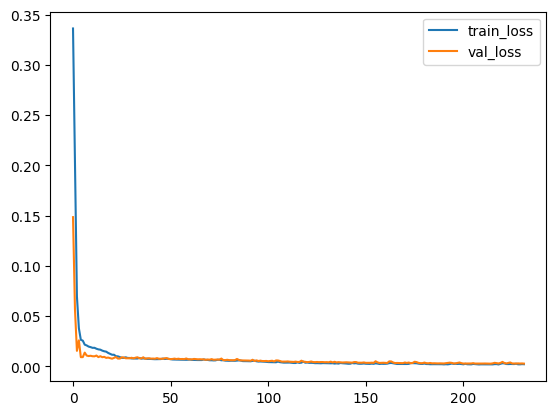

In [ ]:
plt.plot(history.history['loss'], label="train_loss")
plt.plot(history.history['val_loss'], label="val_loss")
plt.legend()

plt.show()

In [ ]:
# Now
# Reshape the last_sequence to match the input shape of the model
last_sequence = X[-1].reshape((1, n_features, 1))

# Predict the next 10 values
predictions = []
for _ in range(10):
    next_value = model.predict(last_sequence)
    predictions.append(next_value[0][0])
    last_sequence = np.roll(last_sequence, -1, axis=1)
    last_sequence[0][-1] = next_value

# To convert this predictions to the actual glucose values, we need to inverse the scaling
predictions = scaler.inverse_transform([predictions])

print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 736ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
[[0.54538381 0.54779112 0.55333787 0.55894899 0.5640524  0.56823003
  0.57136452 0.57333332 0.57567298 0.57856309]]


In [ ]:
# I want to implement an LSTM model by taking values of n_features from [3, 5, 10, 15, 20] and then compare the results and also want to choose patience values from [5, 10, 15, 20] and compare the results.

# I will use the above code and modify it to take the values of n_features and patience as input and then return the predictions and the model.

# To do this I will apply a loop on the values of n_features and patience and then store the results in a dictionary

# I will then convert the dictionary to a pandas dataframe and then save it as a csv file

for n_features in [3, 5, 10, 15, 20]:
    for patience in [5, 10, 15, 20]:
        X, y = prepare_data(time_series_data, n_features)
        X = X.reshape((X.shape[0], X.shape[1], 1))

        split = int(0.8 * len(X))
        X_train, X_val = X[:split], X[split:]
        y_train, y_val = y[:split], y[split:]

        model = Sequential()
        model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_features, 1)))
        model.add(LSTM(50, activation='relu'))
        model.add(Dense(1))
        model.compile(optimizer='adam', loss='mse')

        early_stop = EarlyStopping(monitor='val_loss', patience=patience)

        history = model.fit(X_train, y_train, epochs=500, verbose=1, validation_data = (X_val, y_val) ,callbacks=[early_stop])

        last_sequence = X[-1].reshape((1, n_features, 1))

        predictions = []
        for _ in range(10):
            next_value = model.predict(last_sequence)
            predictions.append(next_value[0][0])
            last_sequence = np.roll(last_sequence, -1, axis=1)
            last_sequence[0][-1] = next_value

        predictions = scaler.inverse_transform([predictions])
        print(predictions)

        # Save the results in a dictionary
        results = {
            'n_features': n_features,
            'patience': patience,
            'predictions': predictions.flatten()
        }

        # Convert the dictionary to a pandas dataframe
        results_df = pd.DataFrame([results])

        # Save the dataframe as a csv file
        results_df.to_csv(f"results_n_features_{n_features}_patience_{patience}.csv")

c:\Users\BMVSI-138\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 15s 302ms/step - loss: 0.3604 - val_loss: 0.1731
Epoch 2/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2852 - val_loss: 0.1263
Epoch 3/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2233 - val_loss: 0.0738
Epoch 4/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.1321 - val_loss: 0.0249
Epoch 5/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0534 - val_loss: 0.0070
Epoch 6/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0165 - val_loss: 0.0287
Epoch 7/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0246 - val_loss: 0.0108
Epoch 8/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0141 - val_loss: 0.0062
Epoch 9/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0156 - val_loss: 0.0072
Epoch 10/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0112 - val_loss: 0.0098
Epoch 11/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0126 - val_loss: 0.0081
Epoch 12/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0112 - val_

c:\Users\BMVSI-138\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 14s 263ms/step - loss: 0.3920 - val_loss: 0.1992
Epoch 2/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.3385 - val_loss: 0.1673
Epoch 3/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2961 - val_loss: 0.1275
Epoch 4/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2311 - val_loss: 0.0794
Epoch 5/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.1465 - val_loss: 0.0294
Epoch 6/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0651 - val_loss: 0.0063
Epoch 7/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0179 - val_loss: 0.0292
Epoch 8/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0250 - val_loss: 0.0117
Epoch 9/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0147 - val_loss: 0.0063
Epoch 10/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0143 - val_loss: 0.0068
Epoch 11/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0114 - val_loss: 0.0084
Epoch 12/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0099 - val_

c:\Users\BMVSI-138\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 14s 202ms/step - loss: 0.3704 - val_loss: 0.1827
Epoch 2/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.3027 - val_loss: 0.1442
Epoch 3/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2340 - val_loss: 0.0986
Epoch 4/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1778 - val_loss: 0.0483
Epoch 5/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0965 - val_loss: 0.0095
Epoch 6/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0268 - val_loss: 0.0171
Epoch 7/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0202 - val_loss: 0.0217
Epoch 8/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0187 - val_loss: 0.0083
Epoch 9/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0141 - val_loss: 0.0064
Epoch 10/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0128 - val_loss: 0.0076
Epoch 11/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0110 - val_loss: 0.0081
Epoch 12/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0094 - val_

c:\Users\BMVSI-138\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 24s 248ms/step - loss: 0.3824 - val_loss: 0.1886
Epoch 2/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.3264 - val_loss: 0.1514
Epoch 3/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2637 - val_loss: 0.1065
Epoch 4/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2068 - val_loss: 0.0529
Epoch 5/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.1094 - val_loss: 0.0097
Epoch 6/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0247 - val_loss: 0.0233
Epoch 7/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0257 - val_loss: 0.0195
Epoch 8/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0145 - val_loss: 0.0062
Epoch 9/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0158 - val_loss: 0.0068
Epoch 10/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0139 - val_loss: 0.0121
Epoch 11/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0120 - val_loss: 0.0089
Epoch 12/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0109 - val_

c:\Users\BMVSI-138\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 14s 243ms/step - loss: 0.3650 - val_loss: 0.1521
Epoch 2/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2373 - val_loss: 0.0859
Epoch 3/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1376 - val_loss: 0.0217
Epoch 4/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0374 - val_loss: 0.0176
Epoch 5/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0213 - val_loss: 0.0138
Epoch 6/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0137 - val_loss: 0.0076
Epoch 7/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0127 - val_loss: 0.0107
Epoch 8/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0126 - val_loss: 0.0091
Epoch 9/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0124 - val_loss: 0.0079
Epoch 10/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0120 - val_loss: 0.0088
Epoch 11/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0124 - val_loss: 0.0100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/ste

c:\Users\BMVSI-138\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 14s 259ms/step - loss: 0.3643 - val_loss: 0.1827
Epoch 2/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.3322 - val_loss: 0.1410
Epoch 3/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.2400 - val_loss: 0.0888
Epoch 4/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1555 - val_loss: 0.0309
Epoch 5/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0555 - val_loss: 0.0099
Epoch 6/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0194 - val_loss: 0.0205
Epoch 7/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0171 - val_loss: 0.0074
Epoch 8/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0189 - val_loss: 0.0073
Epoch 9/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0155 - val_loss: 0.0100
Epoch 10/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0120 - val_loss: 0.0086
Epoch 11/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0113 - val_loss: 0.0078
Epoch 12/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0103 - val_

c:\Users\BMVSI-138\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 14s 248ms/step - loss: 0.3968 - val_loss: 0.1937
Epoch 2/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.3281 - val_loss: 0.1568
Epoch 3/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.2737 - val_loss: 0.1103
Epoch 4/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1948 - val_loss: 0.0511
Epoch 5/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0857 - val_loss: 0.0072
Epoch 6/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0185 - val_loss: 0.0285
Epoch 7/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0210 - val_loss: 0.0072
Epoch 8/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0170 - val_loss: 0.0072
Epoch 9/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0146 - val_loss: 0.0093
Epoch 10/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0121 - val_loss: 0.0086
Epoch 11/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0122 - val_loss: 0.0080
Epoch 12/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0112 - val_

c:\Users\BMVSI-138\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 130ms/step - loss: 0.3543 - val_loss: 0.1769
Epoch 2/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.3070 - val_loss: 0.1306
Epoch 3/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.2244 - val_loss: 0.0740
Epoch 4/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1365 - val_loss: 0.0180
Epoch 5/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0375 - val_loss: 0.0239
Epoch 6/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0332 - val_loss: 0.0214
Epoch 7/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0152 - val_loss: 0.0072
Epoch 8/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0234 - val_loss: 0.0072
Epoch 9/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0152 - val_loss: 0.0120
Epoch 10/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0135 - val_loss: 0.0086
Epoch 11/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0127 - val_loss: 0.0077
Epoch 12/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0104 - val_l

c:\Users\BMVSI-138\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 14s 317ms/step - loss: 0.3797 - val_loss: 0.1733
Epoch 2/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.2892 - val_loss: 0.1049
Epoch 3/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.1671 - val_loss: 0.0245
Epoch 4/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0456 - val_loss: 0.0445
Epoch 5/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0466 - val_loss: 0.0102
Epoch 6/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0247 - val_loss: 0.0099
Epoch 7/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0252 - val_loss: 0.0124
Epoch 8/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0238 - val_loss: 0.0143
Epoch 9/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0215 - val_loss: 0.0092
Epoch 10/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0191 - val_loss: 0.0112
Epoch 11/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0198 - val_loss: 0.0116
Epoch 12/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0189 - val_

c:\Users\BMVSI-138\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 13s 293ms/step - loss: 0.3709 - val_loss: 0.1730
Epoch 2/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.3051 - val_loss: 0.1186
Epoch 3/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.1918 - val_loss: 0.0499
Epoch 4/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0773 - val_loss: 0.0167
Epoch 5/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0367 - val_loss: 0.0133
Epoch 6/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0214 - val_loss: 0.0110
Epoch 7/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0249 - val_loss: 0.0110
Epoch 8/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0203 - val_loss: 0.0114
Epoch 9/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0204 - val_loss: 0.0098
Epoch 10/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0213 - val_loss: 0.0104
Epoch 11/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0185 - val_loss: 0.0099
Epoch 12/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0190 - val_

c:\Users\BMVSI-138\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 12s 275ms/step - loss: 0.3768 - val_loss: 0.1620
Epoch 2/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.2833 - val_loss: 0.0997
Epoch 3/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.1636 - val_loss: 0.0269
Epoch 4/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0460 - val_loss: 0.0363
Epoch 5/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0418 - val_loss: 0.0110
Epoch 6/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0219 - val_loss: 0.0099
Epoch 7/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0245 - val_loss: 0.0101
Epoch 8/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0219 - val_loss: 0.0140
Epoch 9/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0192 - val_loss: 0.0099
Epoch 10/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0170 - val_loss: 0.0098
Epoch 11/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0195 - val_loss: 0.0105
Epoch 12/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0158 - val_

c:\Users\BMVSI-138\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 13s 274ms/step - loss: 0.3661 - val_loss: 0.1799
Epoch 2/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.2867 - val_loss: 0.1371
Epoch 3/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.2207 - val_loss: 0.0793
Epoch 4/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.1302 - val_loss: 0.0134
Epoch 5/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0299 - val_loss: 0.0303
Epoch 6/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0329 - val_loss: 0.0109
Epoch 7/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0275 - val_loss: 0.0103
Epoch 8/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0212 - val_loss: 0.0123
Epoch 9/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0196 - val_loss: 0.0094
Epoch 10/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0187 - val_loss: 0.0099
Epoch 11/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0151 - val_loss: 0.0100
Epoch 12/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0212 - val_

c:\Users\BMVSI-138\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 277ms/step - loss: 0.3395 - val_loss: 0.1416
Epoch 2/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.2287 - val_loss: 0.0529
Epoch 3/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0842 - val_loss: 0.0278
Epoch 4/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0448 - val_loss: 0.0194
Epoch 5/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0335 - val_loss: 0.0116
Epoch 6/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0338 - val_loss: 0.0121
Epoch 7/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0303 - val_loss: 0.0174
Epoch 8/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0232 - val_loss: 0.0115
Epoch 9/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.0256 - val_loss: 0.0118
Epoch 10/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0219 - val_loss: 0.0118
Epoch 11/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0227 - val_loss: 0.0103
Epoch 12/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0235 - val_

c:\Users\BMVSI-138\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 92ms/step - loss: 0.2981 - val_loss: 0.1259
Epoch 2/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1905 - val_loss: 0.0395
Epoch 3/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0529 - val_loss: 0.0352
Epoch 4/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0482 - val_loss: 0.0132
Epoch 5/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0293 - val_loss: 0.0125
Epoch 6/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0272 - val_loss: 0.0116
Epoch 7/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0243 - val_loss: 0.0143
Epoch 8/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0251 - val_loss: 0.0101
Epoch 9/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0241 - val_loss: 0.0104
Epoch 10/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0196 - val_loss: 0.0095
Epoch 11/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0190 - val_loss: 0.0096
Epoch 12/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0176 - val_l

c:\Users\BMVSI-138\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 92ms/step - loss: 0.3454 - val_loss: 0.1651
Epoch 2/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2433 - val_loss: 0.0986
Epoch 3/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.1512 - val_loss: 0.0158
Epoch 4/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0468 - val_loss: 0.0274
Epoch 5/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0342 - val_loss: 0.0129
Epoch 6/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0374 - val_loss: 0.0110
Epoch 7/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0268 - val_loss: 0.0157
Epoch 8/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0306 - val_loss: 0.0119
Epoch 9/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0251 - val_loss: 0.0111
Epoch 10/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0208 - val_loss: 0.0106
Epoch 11/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0217 - val_loss: 0.0097
Epoch 12/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0183 - val_lo

c:\Users\BMVSI-138\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 14s 187ms/step - loss: 0.3601 - val_loss: 0.1418
Epoch 2/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.2048 - val_loss: 0.0410
Epoch 3/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 0.0594 - val_loss: 0.0440
Epoch 4/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0496 - val_loss: 0.0130
Epoch 5/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0342 - val_loss: 0.0127
Epoch 6/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0328 - val_loss: 0.0149
Epoch 7/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0238 - val_loss: 0.0138
Epoch 8/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0252 - val_loss: 0.0110
Epoch 9/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0247 - val_loss: 0.0115
Epoch 10/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0200 - val_loss: 0.0103
Epoch 11/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0202 - val_loss: 0.0098
Epoch 12/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0197 - val_

c:\Users\BMVSI-138\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 12s 284ms/step - loss: 0.3317 - val_loss: 0.1122
Epoch 2/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.1491 - val_loss: 0.0147
Epoch 3/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0445 - val_loss: 0.0316
Epoch 4/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0312 - val_loss: 0.0128
Epoch 5/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0392 - val_loss: 0.0114
Epoch 6/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0296 - val_loss: 0.0160
Epoch 7/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0290 - val_loss: 0.0121
Epoch 8/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0251 - val_loss: 0.0110
Epoch 9/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0263 - val_loss: 0.0116
Epoch 10/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0227 - val_loss: 0.0097
Epoch 11/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0224 - val_loss: 0.0097
Epoch 12/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0203 - val_

c:\Users\BMVSI-138\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 15s 313ms/step - loss: 0.3561 - val_loss: 0.1930
Epoch 2/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 0.3117 - val_loss: 0.1316
Epoch 3/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.2018 - val_loss: 0.0392
Epoch 4/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0671 - val_loss: 0.0521
Epoch 5/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0568 - val_loss: 0.0122
Epoch 6/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 0.0357 - val_loss: 0.0115
Epoch 7/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0315 - val_loss: 0.0157
Epoch 8/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0303 - val_loss: 0.0140
Epoch 9/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0257 - val_loss: 0.0114
Epoch 10/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0252 - val_loss: 0.0128
Epoch 11/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0244 - val_loss: 0.0108
Epoch 12/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0212 - val_

c:\Users\BMVSI-138\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 13s 298ms/step - loss: 0.3057 - val_loss: 0.1324
Epoch 2/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.1845 - val_loss: 0.0416
Epoch 3/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0611 - val_loss: 0.0400
Epoch 4/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0570 - val_loss: 0.0158
Epoch 5/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0390 - val_loss: 0.0140
Epoch 6/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0308 - val_loss: 0.0154
Epoch 7/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0299 - val_loss: 0.0131
Epoch 8/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0296 - val_loss: 0.0112
Epoch 9/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0248 - val_loss: 0.0128
Epoch 10/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0220 - val_loss: 0.0103
Epoch 11/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0225 - val_loss: 0.0104
Epoch 12/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0203 - val_

c:\Users\BMVSI-138\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 13s 311ms/step - loss: 0.3403 - val_loss: 0.1646
Epoch 2/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.2504 - val_loss: 0.1000
Epoch 3/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.1596 - val_loss: 0.0234
Epoch 4/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0475 - val_loss: 0.0384
Epoch 5/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0368 - val_loss: 0.0125
Epoch 6/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0380 - val_loss: 0.0121
Epoch 7/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0361 - val_loss: 0.0140
Epoch 8/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0299 - val_loss: 0.0131
Epoch 9/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0275 - val_loss: 0.0110
Epoch 10/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0268 - val_loss: 0.0115
Epoch 11/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0238 - val_loss: 0.0104
Epoch 12/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 0.0221 - val_

In [ ]:
predictions.flatten()
scaler.inverse_transform([predictions.flatten()])

array([[0.50667417, 0.5223617 , 0.53311813, 0.54077059, 0.5458439 ,
        0.54977584, 0.5522154 , 0.55437291, 0.55612975, 0.55742735]])

In [ ]:
mean_240 = get_previous_3_values_mean(actual_values, 0)
print(mean_240)

95.99999999999999


In [ ]:
# CGPT Generated Code
def prepare_data(time_series_data, n_features):
    X, y = [], []
    for i in range(len(time_series_data) - n_features):
        seq_x = time_series_data[i:i + n_features]
        seq_y = time_series_data[i + n_features]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [ ]:
# CGPT Generated Code
def train_and_evaluate(n_features, patience):
    # Preparing the dataset
    X, y = prepare_data(df['reading'].values, n_features)
    X = X.reshape((X.shape[0], X.shape[1], 1))

    # Split data into training and validation sets
    X_train, X_val = X[:-17], X[-17:-9]
    y_train, y_val = y[:-17], y[-17:-9]

    # Build the LSTM model
    model = Sequential()
    model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_features, 1)))
    model.add(LSTM(50, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')

    # Define early stopping
    early_stop = EarlyStopping(monitor='val_loss', patience=patience)

    # Train the model
    history = model.fit(X_train, y_train, epochs=500, verbose=1, validation_data=(X_val, y_val), callbacks=[early_stop])

    # Plot training history
    plt.plot(history.history['loss'], label="train_loss")
    plt.plot(history.history['val_loss'], label="val_loss")
    plt.legend()
    plt.show()

    # Evaluate the model on the last 9 values
    X_test, y_test = X[-9:], y[-9:]
    last_sequence = X_test[-1].reshape((1, n_features, 1))
    predictions = []
    for _ in range(9):
        next_value = model.predict(last_sequence)
        predictions.append(next_value[0][0])
        last_sequence = np.roll(last_sequence, -1, axis=1)
        last_sequence[0][-1] = next_value

    # Inverse transform the predictions
    predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))
    actuals = scaler.inverse_transform(y_test.reshape(-1, 1))
    print('Predictions:', predictions)
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(actuals, predictions))

    print(f'n_features: {n_features}, patience: {patience}, RMSE: {rmse}')
    return model, rmse, predictions

In [ ]:
n_features_list = [3, 5, 10, 15, 20]
patience_list = [5, 10, 15, 20]

In [ ]:
best_model = None
best_rmse = float('inf')
best_params = {}
best_predictions = None

In [ ]:
for n_features in n_features_list:
    for patience in patience_list:
        model, rmse, predictions = train_and_evaluate(n_features, patience)
        if rmse < best_rmse:
            best_rmse = rmse
            best_model = model
            best_predictions = predictions
            best_params = {'n_features': n_features, 'patience': patience}

In [ ]:
print(f'Best RMSE: {best_rmse}, Best Params: {best_params}')
print('Best Predictions:', best_predictions)


In [2]:
diction = {'a': 2, 'b': 4, 'e': 8, 'c': 1, 'd': 8}
# I want to sort the dictionary based on the values of the dictionary and on the basis of lexographical order of the keys in such a way that the result is {'d': 8, 'e': 8, 'b': 4, 'a': 2, 'c': 1}

sorted_diction = {k: v for k, v in sorted(diction.items(), key=lambda item: (-item[1], item[0]))}

# Simplified version of the above code is

# The key = lambda item: (-item[1], item[0]) is used to sort the dictionary based on the values in descending order and then on the basis of keys in ascending order
# -Item[1] will sort the dictionary based on the values in descending order
# item[0] will sort the dictionary based on the keys in ascending order

# Preference is given to the values in the dictionary and then to the keys in the dictionary

keys = []
for key, value in sorted(diction.items(), key=lambda item: (-item[1], item[0])):
    # Store the keys in an array
    keys.append(key)

keys

['d', 'e', 'b', 'a', 'c']

['t', 'cattle', 'was', 'rattled', 'by', 'the', 'battery']

4
3
2
